# NNDL HW4 Q3
sajjad pakdaman savoji

810195517

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
class MexicanHatNet():
    def __init__(self, n, R1, R2, C1, C2, x_max, t_max):
        assert R2>R1
        self.n_ = n
        self.R1_ = R1
        self.R2_ = R2
        self.C1_ = C1
        self.C2_ = C2
        self.x_max_ = x_max
        self.t_max_ = t_max
        self.init_W()
    
    def init_W(self):
        self.W = np.zeros((self.n_, self.n_), dtype='float')
        for i in range(self.n_):
            for j in range(max(0, i-self.R2_), min(self.n_, i+self.R2_+1)):
                self.W[i][j] = self.C2_
            for j in range(max(0, i-self.R1_), min(self.n_, i+self.R1_+1)):
                self.W[i][j] = self.C1_
        self.W += np.eye(self.n_)


    def act_f(self, x):
        mask = 1*(x >= 0)
        x = x * mask
        mask = (x>=self.x_max_)
        x[mask] = self.x_max_
        return x

    def stop_cond(self, x, t):
        '''
        stop condition is based on t_max param
        and also based on saturation value x_max
        '''
        if t > self.t_max_:
            return True
        if self.x_max_ in x:
            return True
        return False

    def __call__(self, x, log=True):
        t = 0
        assert x.shape == (self.n_, 1)
        if log:
            L = []
            L.append(x.flatten())
        while not self.stop_cond(x, t):
            t+=1
            x = self.act_f(np.matmul(self.W, x))
            if log:
                L.append(x.flatten())
        if log:
            return np.argmax(x), L        
        return np.argmax(x)

In [61]:
def plot_log(log):
    for t in range(len(log)):
        plt.plot(log[t], label=f'{t}')
    plt.grid()
    plt.xlabel('index')
    plt.ylabel('value')
    plt.title(f'{len(log)} iterations')
    plt.show()

## part 1: R1=0, R2 = $\infty$

In [57]:
x = np.array([0.27, 0.35, 0.44, 0.58, 0.66, 0.77, 0.4, 0.32, 0.2, 0.15, 0.08]).reshape(-1, 1)
n, R1, R2, C1, C2, x_max, t_max = x.shape[0], 0, float('inf'), 0.01, -0.01, 2, 200
net = MexicanHatNet(n, R1, R2, C1, C2, x_max, t_max)

In [58]:
arg, log = net(x)

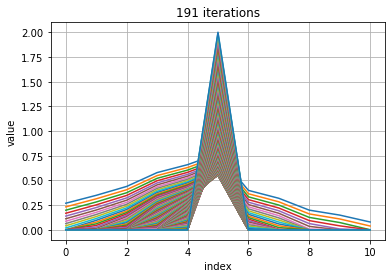

In [62]:
plot_log(log)

## part2: R1=1, R2=3

In [92]:
x = np.array([0.27, 0.35, 0.44, 0.58, 0.66, 0.77, 0.4, 0.32, 0.2, 0.15, 0.08]).reshape(-1, 1)
n, R1, R2, C1, C2, x_max, t_max = x.shape[0], 1, 3, 0.01, -0.01, 2, 200
net = MexicanHatNet(n, R1, R2, C1, C2, x_max, t_max)

In [93]:
arg, log = net(x)

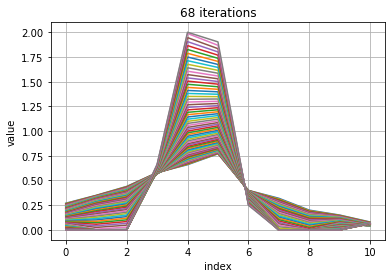

In [94]:
plot_log(log)

In [70]:
print(net.W)

[[ 1.01  0.01 -0.01 -0.01  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.01  1.01  0.01 -0.01 -0.01  0.    0.    0.    0.    0.    0.  ]
 [-0.01  0.01  1.01  0.01 -0.01 -0.01  0.    0.    0.    0.    0.  ]
 [-0.01 -0.01  0.01  1.01  0.01 -0.01 -0.01  0.    0.    0.    0.  ]
 [ 0.   -0.01 -0.01  0.01  1.01  0.01 -0.01 -0.01  0.    0.    0.  ]
 [ 0.    0.   -0.01 -0.01  0.01  1.01  0.01 -0.01 -0.01  0.    0.  ]
 [ 0.    0.    0.   -0.01 -0.01  0.01  1.01  0.01 -0.01 -0.01  0.  ]
 [ 0.    0.    0.    0.   -0.01 -0.01  0.01  1.01  0.01 -0.01 -0.01]
 [ 0.    0.    0.    0.    0.   -0.01 -0.01  0.01  1.01  0.01 -0.01]
 [ 0.    0.    0.    0.    0.    0.   -0.01 -0.01  0.01  1.01  0.01]
 [ 0.    0.    0.    0.    0.    0.    0.   -0.01 -0.01  0.01  1.01]]
